In [2]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from src.utils import plot_path
import wandb
from tqdm import tqdm
from src.shortest_path import ShortestPath
from collections import defaultdict
import pandas as pd

In [3]:
G = ox.load_graphml("./houston_tx_usa_drive_500.graphml")
# ox.plot_graph(G)

In [11]:
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)
A = nx.adjacency_matrix(G, weight="speeds")
nodes_dict = {idx:n for idx, n in enumerate(G.nodes())}
D = A.toarray()

In [7]:
def remove_de_node(D, nodes_dict):
    # remove dead-end road
    de_nodes = [nodes_dict[idx] for idx, n in enumerate(D) if sum(n) <= 0]
    return de_nodes

In [8]:
de_nodes = remove_de_node(D, nodes_dict)
print(de_nodes)
G.remove_nodes_from(de_nodes)

[152264064]


In [9]:
len(G.nodes())

116

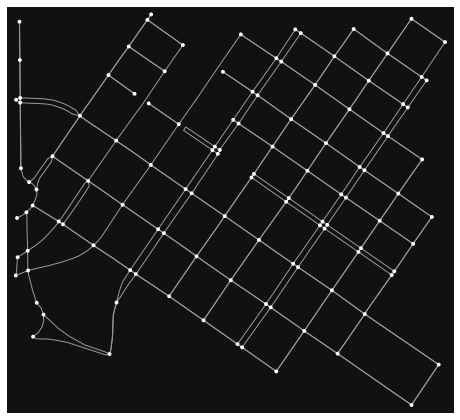

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [86]:
ox.plot_graph(G)
# ox.plot_graph_route(G)

In [3]:
dummy_route = []
for x, degree in nx.degree(G, weight="length"):
    if degree <= 0:
        print(x, degree)
        dummy_route.append(x)

In [5]:
for n in G.nodes():
    print(n, )
    break

151820557


In [22]:
nodes = []
for idx, (n, val) in enumerate(G.degree()):
    if val < 2:
        print(n, val)
        nodes.append(n)

3232451648 1


In [69]:
G.remove_nodes_from(nodes)

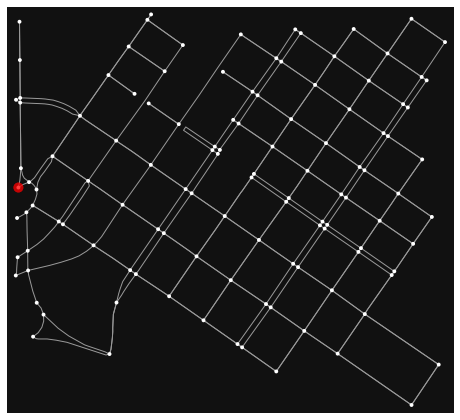

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [64]:
# ox.plot_graph(G)
ox.plot_graph_route(G, na_nodes)

In [ ]:
for idx, x in enumerate(A):
    # print(x.indices)
    if idx == 39:
        print(x.indices)
        break

In [ ]:
A = G.adjacency()
# check items in adjacency
for n, nbrdict in A:
    print(n, nbrdict)
    break

In [30]:
for idx, i in enumerate(D):
    s = sum(i)
    if s <= 0:
        print(idx, s)

40 0.0
